(demo2022-07-06)=
# Demo Notebook 2022-07-06

Demos from the live sessions on 2022-07-06.


## Setup

Ye olde setup chunk below.


In [1]:
import grama as gr
import pandas as pd
DF = gr.Intention()
%matplotlib inline


In [2]:
from grama.data import df_stang_wide
df_stang_wide

,thick,E_00,mu_00,E_45,mu_45,E_90,mu_90,alloy
0,0.022,10600,0.321,10700,0.329,10500,0.310,al_24st
1,0.022,10600,0.323,10500,0.331,10700,0.323,al_24st
2,0.032,10400,0.329,10400,0.318,10300,0.322,al_24st
3,0.032,10300,0.319,10500,0.326,10400,0.330,al_24st
4,0.064,10500,0.323,10400,0.331,10400,0.327,al_24st
5,0.064,10700,0.328,10500,0.328,10500,0.320,al_24st
6,0.081,10000,0.315,10000,0.320,9900,0.314,al_24st
7,0.081,10100,0.312,9900,0.312,10000,0.316,al_24st
8,0.081,10000,0.311,-1,-1.000,9900,0.314,al_24st


## Wrangling Data

In [3]:
df_stang = (
    df_stang_wide
    ## Single-call pivoting of the data
    >> gr.tf_pivot_longer(
        columns=["E_00", "mu_00", "E_45", "mu_45", "E_90", "mu_90"],
        names_to=[".value", "angle"],
        names_sep="_"
    )
    ## Filter out the invalid values
    >> gr.tf_filter(DF.E > 0)
    ## Convert angle values to numeric
    >> gr.tf_mutate(
        angle=gr.as_float(DF.angle)
    )
)

df_stang

/home/zach/Git/py_grama/grama/tran_pivot.py:570: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,thick,alloy,angle,E,mu
0,0.022,al_24st,0.0,10600.0,0.321
1,0.022,al_24st,45.0,10700.0,0.329
2,0.022,al_24st,90.0,10500.0,0.310
3,0.022,al_24st,0.0,10600.0,0.323
4,0.022,al_24st,45.0,10500.0,0.331
5,0.022,al_24st,90.0,10700.0,0.323
6,0.032,al_24st,0.0,10400.0,0.329
7,0.032,al_24st,45.0,10400.0,0.318
8,0.032,al_24st,90.0,10300.0,0.322
9,0.032,al_24st,0.0,10300.0,0.319


In [4]:
df_stang_invalid = (
    df_stang_wide
    ## Single-call pivoting of the data
    >> gr.tf_pivot_longer(
        columns=["E_00", "mu_00", "E_45", "mu_45", "E_90", "mu_90"],
        names_to=[".value", "angle"],
        names_sep="_"
    )
    ## Leave in the invalid values
    # >> gr.tf_filter(DF.E > 0)
    ## Convert angle values to numeric
    >> gr.tf_mutate(
        angle=gr.as_float(DF.angle)
    )
)

df_stang_invalid

/home/zach/Git/py_grama/grama/tran_pivot.py:570: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,thick,alloy,angle,E,mu
0,0.022,al_24st,0.0,10600.0,0.321
1,0.022,al_24st,45.0,10700.0,0.329
2,0.022,al_24st,90.0,10500.0,0.310
3,0.022,al_24st,0.0,10600.0,0.323
4,0.022,al_24st,45.0,10500.0,0.331
5,0.022,al_24st,90.0,10700.0,0.323
6,0.032,al_24st,0.0,10400.0,0.329
7,0.032,al_24st,45.0,10400.0,0.318
8,0.032,al_24st,90.0,10300.0,0.322
9,0.032,al_24st,0.0,10300.0,0.319


Note that observation `df_stang_invalid.index == 25` has `E == -1`, which is not a valid number for this material property.


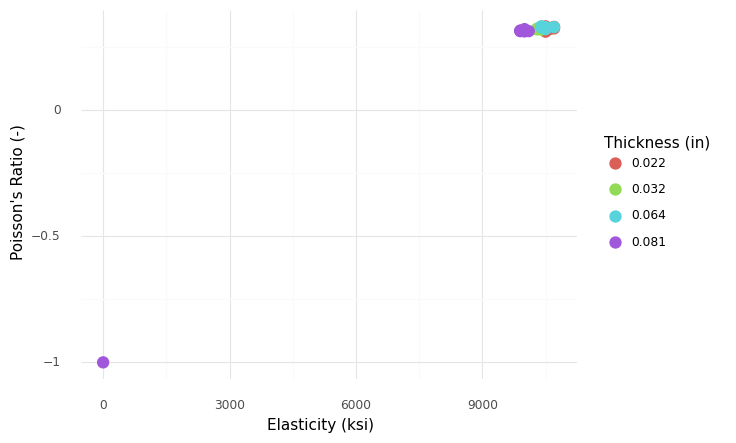

<ggplot: (8749808140171)>

In [5]:
# NOTE: No need to edit; run and inspect
(
    df_stang_invalid
    >> gr.ggplot(gr.aes("E", "mu", color="factor(thick)"))
    + gr.geom_point(size=4)
    
    + gr.scale_color_discrete(name="Thickness (in)")
    + gr.theme_minimal()
    + gr.labs(
        x="Elasticity (ksi)",
        y="Poisson's Ratio (-)",
    )
)

/home/zach/Bin/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zach/Bin/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: stang-E-mu.png


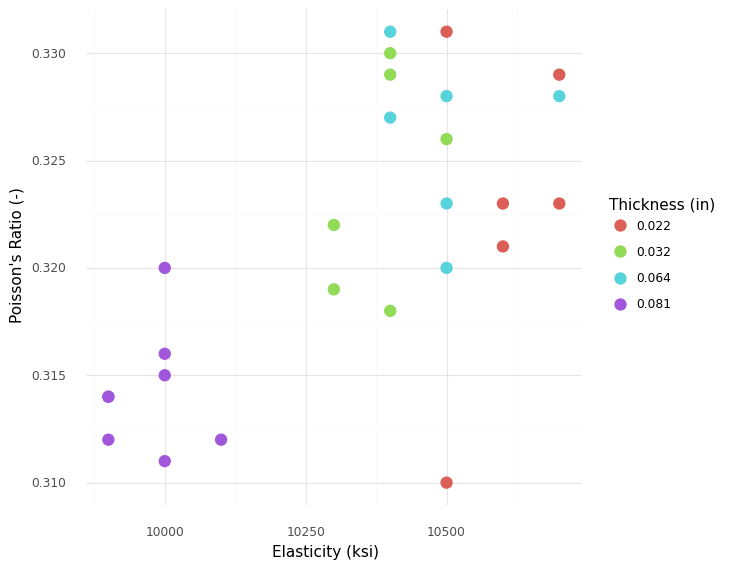

<ggplot: (8749805949904)>

In [8]:
# NOTE: No need to edit; run and inspect
p = (
    df_stang
    >> gr.ggplot(gr.aes("E", "mu", color="factor(thick)"))
    + gr.geom_point(size=4)
    
    + gr.scale_color_discrete(name="Thickness (in)")
    + gr.theme_minimal()
    + gr.theme(aspect_ratio=1)
    + gr.labs(
        x="Elasticity (ksi)",
        y="Poisson's Ratio (-)",
    )
)
p.save("stang-E-mu.png")
p